# Build a small application:

Walkthrough task:

**Intersaction over Union (IoU)**

IoU: 0.14285714285714285


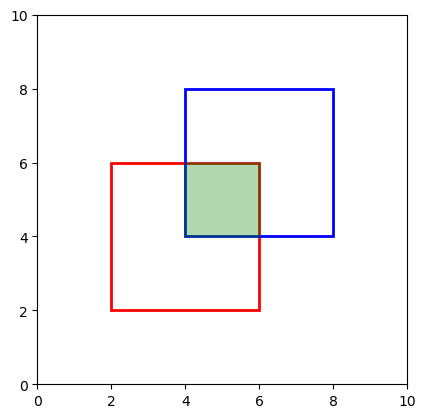

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to calculate area of a rectangle given its coordinates
def area(x1, y1, x2, y2):
    return max(0, (x2 - x1)) * max(0, (y2 - y1))

# Function to compute IoU
def iou(rectA, rectB):
    # Rectangles A and B are represented by (x1, y1, x2, y2)
    x1_A, y1_A, x2_A, y2_A = rectA
    x1_B, y1_B, x2_B, y2_B = rectB

    # Intersection coordinates
    x1_inter = max(x1_A, x1_B)
    y1_inter = max(y1_A, y1_B)
    x2_inter = min(x2_A, x2_B)
    y2_inter = min(y2_A, y2_B)

    # Area of Intersection
    inter_area = area(x1_inter, y1_inter, x2_inter, y2_inter)

    # Area of both rectangles
    area_A = area(x1_A, y1_A, x2_A, y2_A)
    area_B = area(x1_B, y1_B, x2_B, y2_B)

    # Area of Union
    union_area = area_A + area_B - inter_area

    # IoU
    iou_value = inter_area / union_area if union_area != 0 else 0
    return iou_value

# Visualization using matplotlib
def visualize(rectA, rectB):
    fig, ax = plt.subplots()

    # Create two rectangles
    rect1 = patches.Rectangle((rectA[0], rectA[1]), rectA[2] - rectA[0], rectA[3] - rectA[1],
                              linewidth=2, edgecolor='r', facecolor='none')
    rect2 = patches.Rectangle((rectB[0], rectB[1]), rectB[2] - rectB[0], rectB[3] - rectB[1],
                              linewidth=2, edgecolor='b', facecolor='none')

    # Add rectangles to plot
    ax.add_patch(rect1)
    ax.add_patch(rect2)

    # Intersection area shading
    x1_inter = max(rectA[0], rectB[0])
    y1_inter = max(rectA[1], rectB[1])
    x2_inter = min(rectA[2], rectB[2])
    y2_inter = min(rectA[3], rectB[3])

    if x2_inter > x1_inter and y2_inter > y1_inter:
        inter_rect = patches.Rectangle((x1_inter, y1_inter), x2_inter - x1_inter, y2_inter - y1_inter,
                                       linewidth=2, edgecolor='g', facecolor='green', alpha=0.3)
        ax.add_patch(inter_rect)

    # Set the limits of the plot
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Example usage
rectA = (2, 2, 6, 6)  # Rectangle A (x1, y1, x2, y2)
rectB = (4, 4, 8, 8)  # Rectangle B (x1, y1, x2, y2)

print(f"IoU: {iou(rectA, rectB)}")
visualize(rectA, rectB)
